### Initialise arrays etc

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}



<IPython.core.display.Javascript object>

In [2]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from copy import deepcopy

from Vis import *
mpl.rcParams['figure.figsize'] = (14,6)

#array = ['W102', 'W392']  # Test

array = ['W102', 'W4', 'W45', 'W173', 'W196', 'W392']  # EW 6A

#array = ['W196', 'W64', 'W113', 'W392']  # Asteroid RADAR
#array = ['W392', 'W64']  # Asteroid RADAR


Dec = deg2rad(-43.2)
RA = deg2rad(0) # This actually should make no difference at all
step = 1  # Inverval for calculations, in minutes
freq = 7100; # MHz
FFTSize = 8192
bandwidth = 128 # MHz
overSampling = 32/27 # Seconds

antenna = []

antenna.append(Telescope("N2",   "N2",   "ATCA", 12, 100, location=[-4751637.61372, 2791734.5617, -3200464.67139]))
antenna.append(Telescope("N5",   "N5",   "ATCA", 12, 100, location=[-4751657.54872, 2791746.3047, -3200425.00839]))  
antenna.append(Telescope("N7",   "N7",   "ATCA", 12, 100, location=[-4751670.83972, 2791754.1337, -3200398.56639]))
antenna.append(Telescope("N11",  "N11",  "ATCA", 12, 100, location=[-4751697.42072, 2791769.7907, -3200345.68239]))
antenna.append(Telescope("N14",  "N14",  "ATCA", 12, 100, location=[-4751717.35672, 2791781.5337, -3200306.01939]))
antenna.append(Telescope("W0",   "W0",   "ATCA", 12, 100, location=[-4752447.78172, 2790328.7857, -3200491.11339]))
antenna.append(Telescope("W2",   "W2",   "ATCA", 12, 100, location=[-4752432.24472, 2790355.1617, -3200491.11339]))
antenna.append(Telescope("W4",   "W4",   "ATCA", 12, 100, location=[-4752416.70772, 2790381.5387, -3200491.11339]))
antenna.append(Telescope("W6",   "W6",   "ATCA", 12, 100, location=[-4752401.17072, 2790407.9147, -3200491.11339]))
antenna.append(Telescope("W8",   "W8",   "ATCA", 12, 100, location=[-4752385.63372, 2790434.2907, -3200491.11339]))
antenna.append(Telescope("W10",  "W10",  "ATCA", 12, 100, location=[-4752370.09672, 2790460.6677, -3200491.11339]))
antenna.append(Telescope("W12",  "W12",  "ATCA", 12, 100, location=[-4752354.55972, 2790487.0437, -3200491.11339]))
antenna.append(Telescope("W14",  "W14",  "ATCA", 12, 100, location=[-4752339.02272, 2790513.4207, -3200491.11339]))
antenna.append(Telescope("W16",  "W16",  "ATCA", 12, 100, location=[-4752323.48572, 2790539.7967, -3200491.11339]))
antenna.append(Telescope("W32",  "W32",  "ATCA", 12, 100, location=[-4752199.19072, 2790750.8077, -3200491.11339]))
antenna.append(Telescope("W45",  "W45",  "ATCA", 12, 100, location=[-4752098.19972, 2790922.2537, -3200491.11339]))
antenna.append(Telescope("W64",  "W64",  "ATCA", 12, 100, location=[-4751950.59872, 2791172.8287, -3200491.11339]))
antenna.append(Telescope("W84",  "W84",  "ATCA", 12, 100, location=[-4751795.22972, 2791436.5927, -3200491.11339]))
antenna.append(Telescope("W98",  "W98",  "ATCA", 12, 100, location=[-4751686.47072, 2791621.2277, -3200491.11339]))
antenna.append(Telescope("W100", "W100", "ATCA", 12, 100, location=[-4751670.93372, 2791647.6037, -3200491.11339]))
antenna.append(Telescope("W102", "W102", "ATCA", 12, 100, location=[-4751655.39672, 2791673.9797, -3200491.11339]))
antenna.append(Telescope("W104", "W104", "ATCA", 12, 100, location=[-4751639.85972, 2791700.3567, -3200491.11339]))
antenna.append(Telescope("W106", "W106", "ATCA", 12, 100, location=[-4751624.32272, 2791726.7327, -3200491.11339]))
antenna.append(Telescope("W109", "W109", "ATCA", 12, 100, location=[-4751601.01772, 2791766.2967, -3200491.11339]))
antenna.append(Telescope("W110", "W110", "ATCA", 12, 100, location=[-4751593.24872, 2791779.4857, -3200491.11339]))
antenna.append(Telescope("W111", "W111", "ATCA", 12, 100, location=[-4751585.48072, 2791792.6737, -3200491.11339]))
antenna.append(Telescope("W112", "W112", "ATCA", 12, 100, location=[-4751577.71172, 2791805.8617, -3200491.11339]))
antenna.append(Telescope("W113", "W113", "ATCA", 12, 100, location=[-4751569.94372, 2791819.0497, -3200491.11339]))
antenna.append(Telescope("W124", "W124", "ATCA", 12, 100, location=[-4751484.49072, 2791964.1197, -3200491.11339]))
antenna.append(Telescope("W125", "W125", "ATCA", 12, 100, location=[-4751476.72172, 2791977.3077, -3200491.11339]))
antenna.append(Telescope("W128", "W128", "ATCA", 12, 100, location=[-4751453.41672, 2792016.8727, -3200491.11339]))
antenna.append(Telescope("W129", "W129", "ATCA", 12, 100, location=[-4751445.64772, 2792030.0607, -3200491.11339]))
antenna.append(Telescope("W140", "W140", "ATCA", 12, 100, location=[-4751360.19472, 2792175.1307, -3200491.11339]))
antenna.append(Telescope("W147", "W147", "ATCA", 12, 100, location=[-4751305.81472, 2792267.4477, -3200491.11339]))
antenna.append(Telescope("W148", "W148", "ATCA", 12, 100, location=[-4751298.04672, 2792280.6357, -3200491.11339]))
antenna.append(Telescope("W163", "W163", "ATCA", 12, 100, location=[-4751181.51972, 2792478.4587, -3200491.11339]))
antenna.append(Telescope("W168", "W168", "ATCA", 12, 100, location=[-4751142.67672, 2792544.3997, -3200491.11339]))
antenna.append(Telescope("W172", "W172", "ATCA", 12, 100, location=[-4751111.60372, 2792597.1527, -3200491.11339]))
antenna.append(Telescope("W173", "W173", "ATCA", 12, 100, location=[-4751103.83472, 2792610.3407, -3200491.11339]))
antenna.append(Telescope("W182", "W182", "ATCA", 12, 100, location=[-4751033.91872, 2792729.0337, -3200491.11339]))
antenna.append(Telescope("W189", "W189", "ATCA", 12, 100, location=[-4750979.53872, 2792821.3517, -3200491.11339]))
antenna.append(Telescope("W190", "W190", "ATCA", 12, 100, location=[-4750971.77072, 2792834.5397, -3200491.11339]))
antenna.append(Telescope("W195", "W195", "ATCA", 12, 100, location=[-4750932.92772, 2792900.4807, -3200491.11339]))
antenna.append(Telescope("W196", "W196", "ATCA", 12, 100, location=[-4750925.15972, 2792913.6687, -3200491.11339]))
antenna.append(Telescope("W392", "W392", "ATCA", 12, 100, location=[-4749402.52072, 2795498.5367, -3200491.06039]))


# Just Select the antenna we want now
if len(array)>0:
    newants = []
    for a in array:
        for aa in antenna:
            if aa.name.lower() == a.lower():
                newants.append(aa)
                break
    antenna = newants

C = 2.99792458e8
    
step *= 2*pi/(60*24)  # Convert to radians
bandwidth *= 1e6
wavelength = C/(freq*1e6)

specRes = bandwidth*overSampling/FFTSize
sampleTime = 1/(bandwidth*overSampling)
FFTTime = sampleTime * FFTSize

print("Spectral Resolution = {:.2f} kHz".format(specRes/1000))
print("Velocity Resolution = {:.4f} km/s".format(specRes/(freq*1e6)*C/1000))
print("Sample Time = {:.3f} nsec".format(sampleTime*1e9))
print("FFT Time = {:.1f} msec".format(FFTTime*1e3))


Spectral Resolution = 18.52 kHz
Velocity Resolution = 0.7819 km/s
Sample Time = 6.592 nsec
FFT Time = 0.1 msec


### Create baselines

In [3]:
baselines = []
for j in range(1, len(antenna)):
    baselines.append(Baseline(antenna[0], antenna[j]))

### Baseline Delays

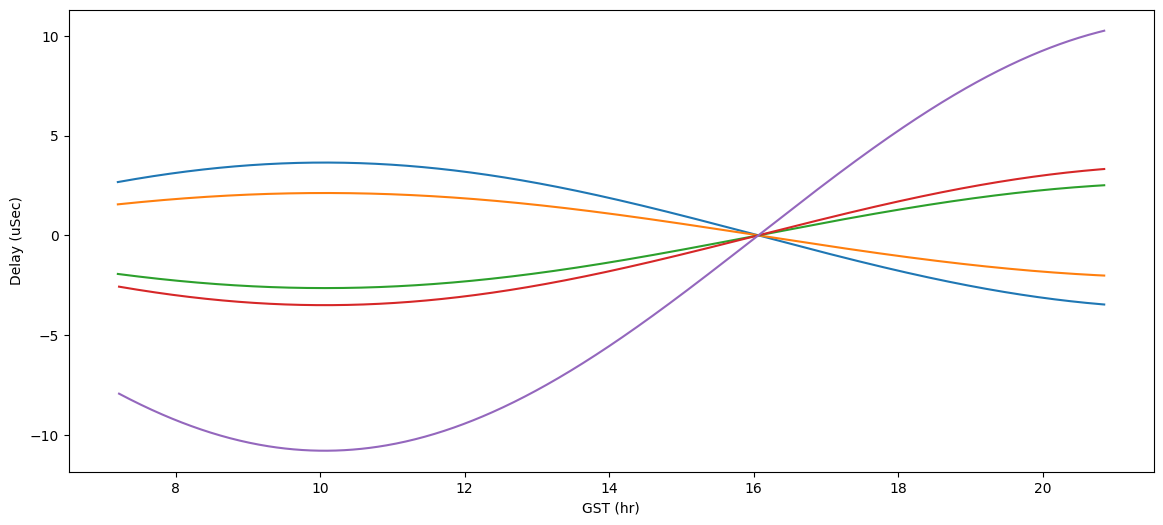

In [4]:
for b in baselines:
    b.calcUp(RA, Dec, step)
    
    delay = [b.delay(RA, Dec, gst) for gst in b.gst]
    times = [rad2hour(t) for t in b.gst]
    plt.plot(times, delay)
    
plt.xlabel('GST (hr)')
plt.ylabel('Delay (uSec)');

### Maximum Delay


In [5]:
maxDelay = 0
for b in baselines:
    b.calcUp(RA, Dec, step)
    
    delay = [b.delay(RA, Dec, gst) for gst in b.gst]
    thisMax = np.max(np.abs(delay))
    if thisMax>maxDelay: maxDelay = thisMax
        
print("Maximum Delay = {:.1f} uSec".format(maxDelay))

Maximum Delay = 10.8 uSec


### Delay Vs Dec

Maximum Delay = 14.8 uSec at Dec = 0.0


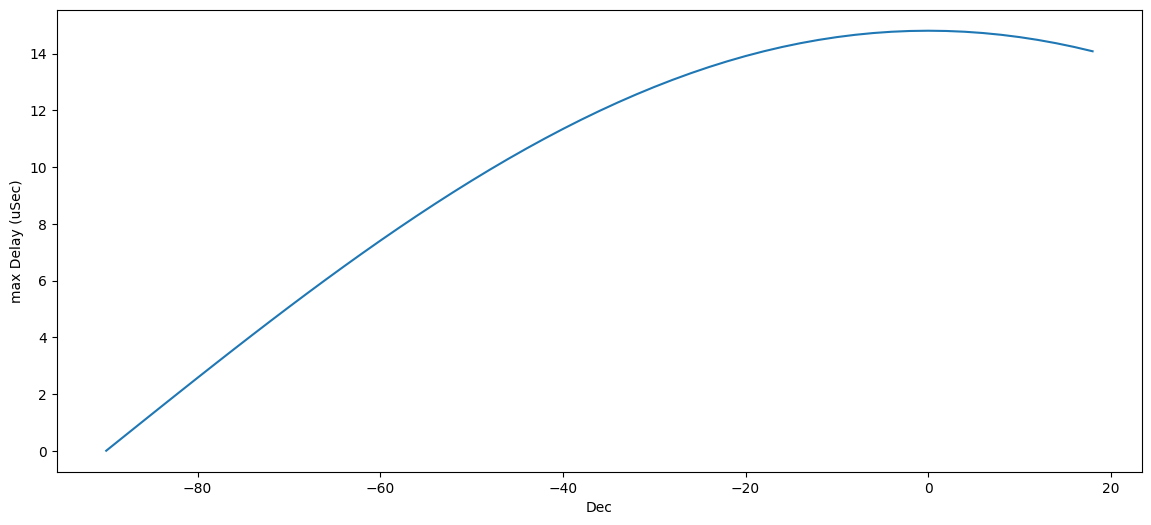

In [6]:
mDelay = []
Decs = list(range(-90, 20, 2))
for d in Decs:
    thisDec = deg2rad(d)
    maxDelay = 0
    for b in baselines:
        b.calcUp(RA, thisDec, step)
    
        delay = [b.delay(RA, thisDec, gst) for gst in b.gst]
        thisMax = np.max(np.abs(delay))
        if thisMax>maxDelay: maxDelay = thisMax

    mDelay.append(maxDelay)
    
plt.plot(Decs, mDelay)
    
plt.xlabel('Dec')
plt.ylabel('max Delay (uSec)');   
i = np.argmax(mDelay)
print("Maximum Delay = {:.1f} uSec at Dec = {:.1f}".format(mDelay[i], Decs[i]))


### Baseline Rates

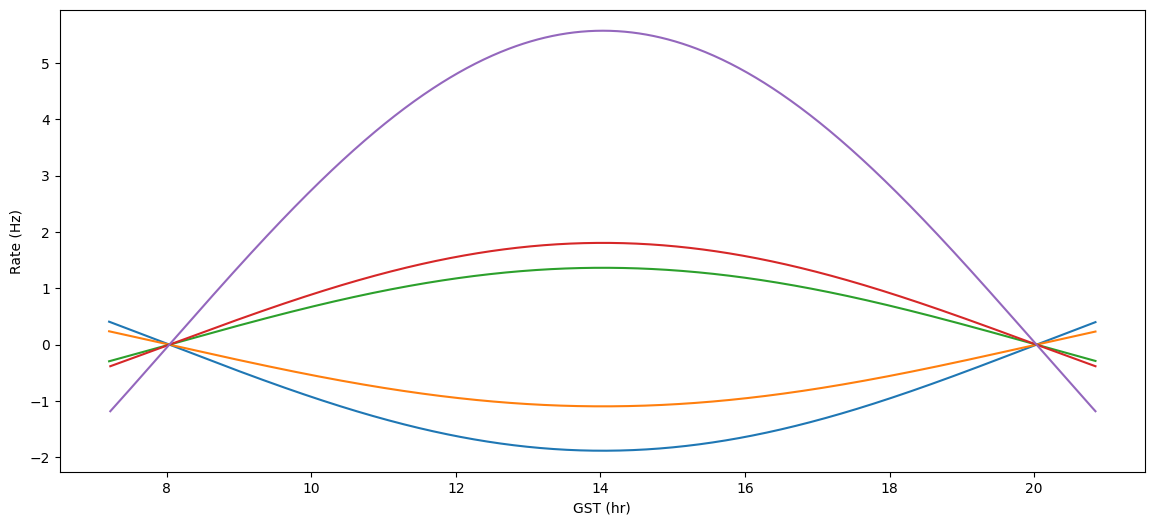

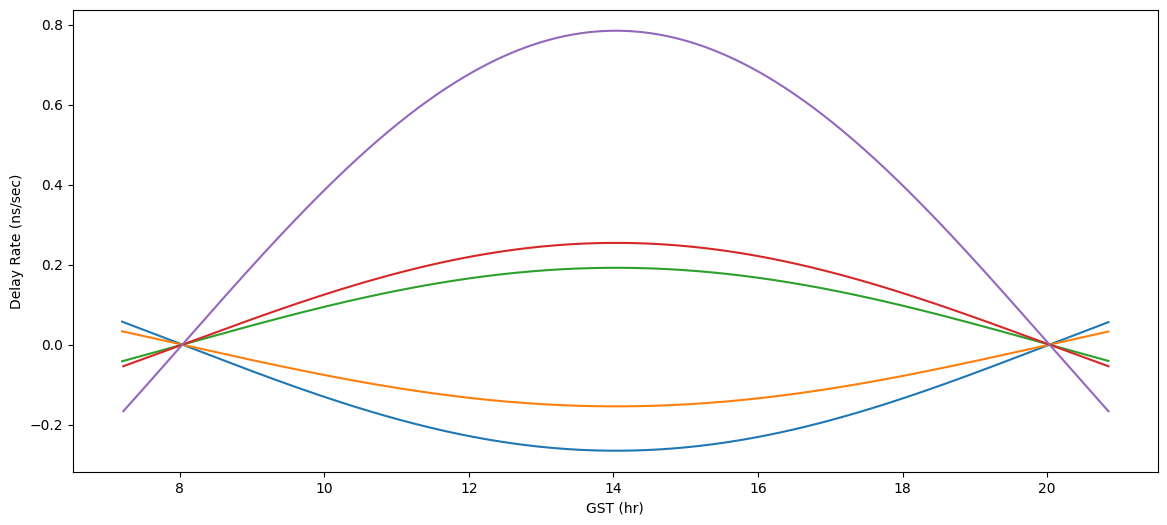

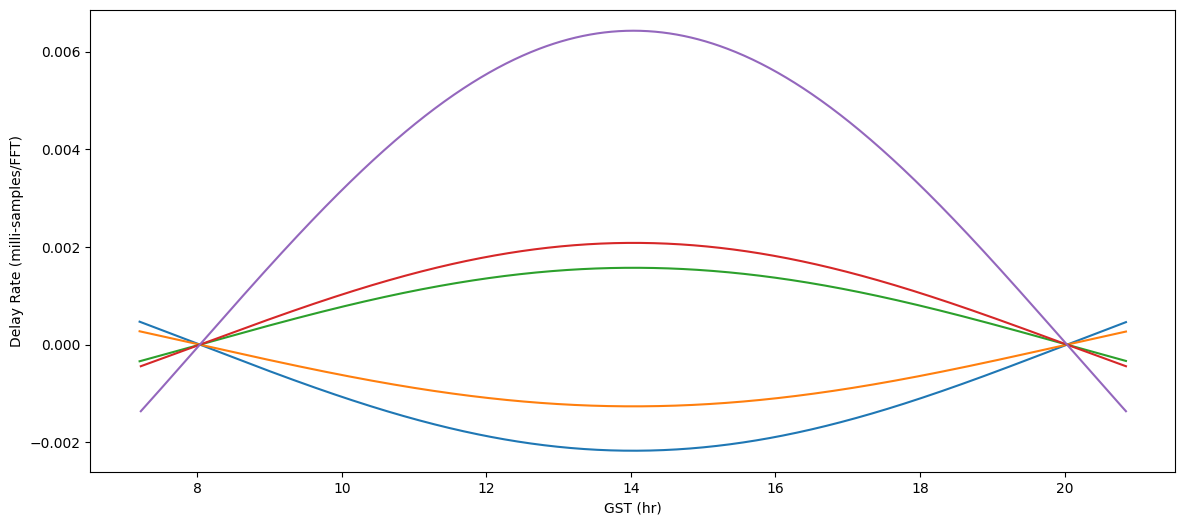

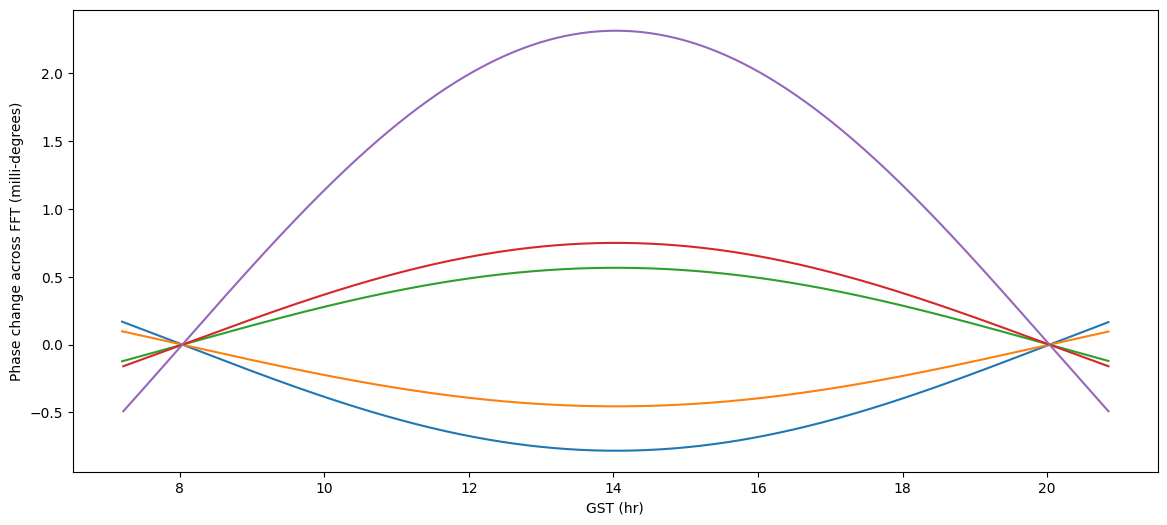

In [7]:
# Fringe Rate (Hz)
for b in baselines:
    b.calcUp(RA, Dec, step)
    
    rate = [b.rate(RA, Dec, gst, wavelength) for gst in b.gst]
    times = [rad2hour(t) for t in b.gst]
    plt.plot(times, rate)
    
plt.xlabel('GST (hr)')
plt.ylabel('Rate (Hz)');

plt.show()

# Delay Rate nSec/sec
for b in baselines:
    b.calcUp(RA, Dec, step)
    
    rate = [b.rate(RA, Dec, gst, None)*1e9 for gst in b.gst]
    times = [rad2hour(t) for t in b.gst]
    plt.plot(times, rate)
    
plt.xlabel('GST (hr)')
plt.ylabel('Delay Rate (ns/sec)');

plt.show()

# Samples/FFT
for b in baselines:
    b.calcUp(RA, Dec, step)
    
    rate = [b.rate(RA, Dec, gst, None)/sampleTime*FFTTime*1e3 for gst in b.gst]
    times = [rad2hour(t) for t in b.gst]
    plt.plot(times, rate)
    
plt.xlabel('GST (hr)')
plt.ylabel('Delay Rate (milli-samples/FFT)');

plt.show()

# Phase change 
for b in baselines:
    b.calcUp(RA, Dec, step)
    
    rate = [b.rate(RA, Dec, gst, None)/sampleTime*FFTTime*360*1e3 for gst in b.gst]
    times = [rad2hour(t) for t in b.gst]
    plt.plot(times, rate)
    
plt.xlabel('GST (hr)')
plt.ylabel('Phase change across FFT (milli-degrees)');



### Rate vs Dec

Maximum Rate = 2752.1 deg/Sec
Maximum Rate = 2752.1 deg/Sec at Dec = 0.0


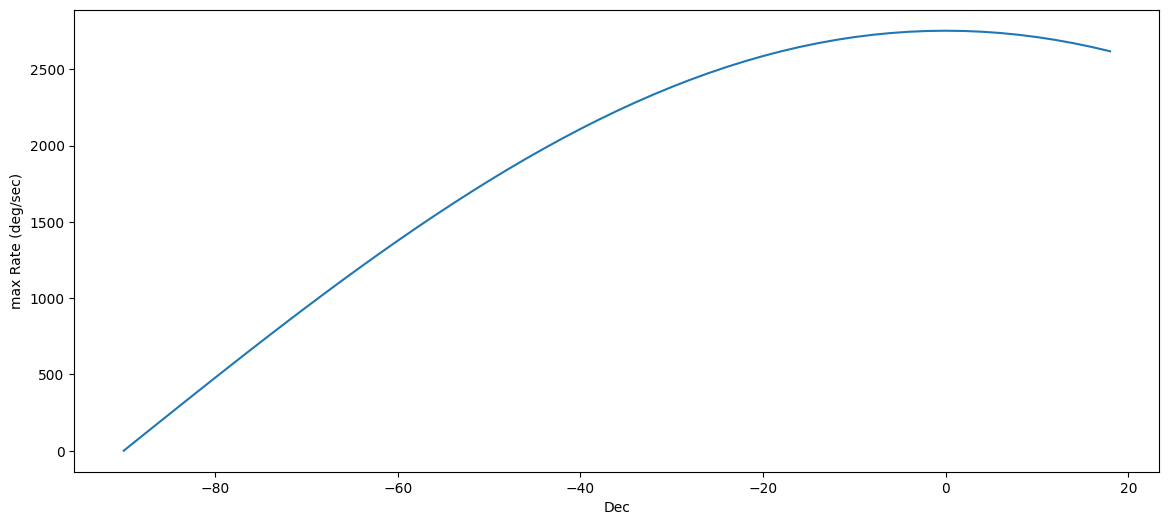

In [8]:
mRate = []
Decs = list(range(-90, 20, 2))
for d in Decs:
    thisDec = deg2rad(d)
    maxRate = 0
    for b in baselines:
        b.calcUp(RA, thisDec, step)
    
        rate = [b.rate(RA, thisDec, gst, wavelength)*360 for gst in b.gst]
        thisMax = np.max(np.abs(rate))
        if thisMax>maxRate: maxRate = thisMax

    mRate.append(maxRate)
    
fig, axes = plt.subplots()
axes.plot(Decs, mRate)
    
axes.set_xlabel('Dec')
axes.set_ylabel('max Rate (deg/sec)');   
print("Maximum Rate = {:.1f} deg/Sec".format(np.max(mRate)))

i = np.argmax(mRate)
print("Maximum Rate = {:.1f} deg/Sec at Dec = {:.1f}".format(mRate[i], Decs[i]))



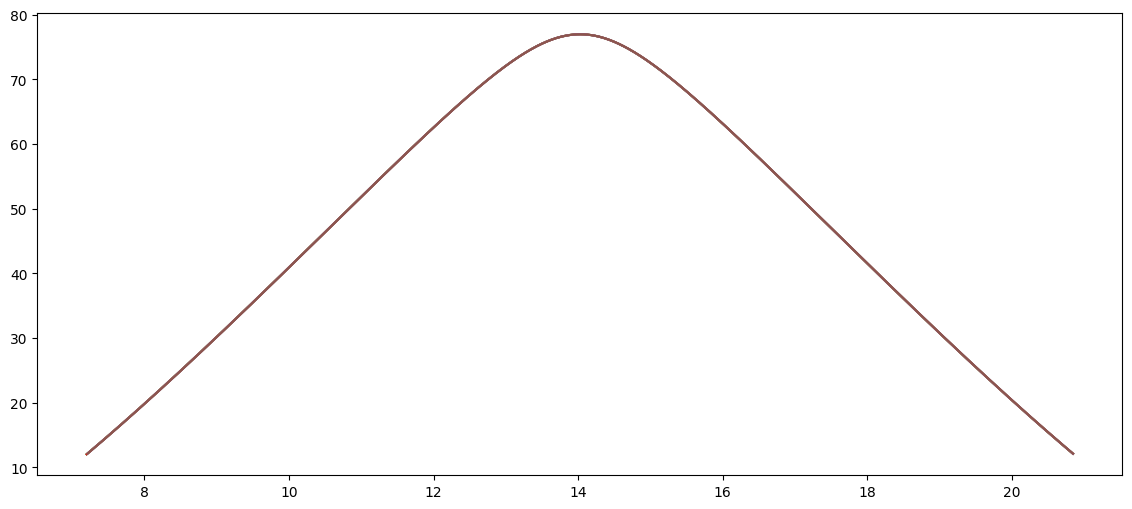

In [9]:
for a in antenna:
    a.calcUp(RA, Dec, step)
    (Az,El) = a.calcAzEl(RA, Dec) 
    El = rad2deg(El)
    times = [rad2hour(t) for t in a.gst]
    plt.plot(times, El)